# **Simulation of a positron-induced Muon Source (part 1)**


###Laboratory of Computational Physics (mod. A) - Physics of Data, Unipd

#####**Authors:**
- Qiqi Zhang
- David Altamirano
- Stefano Meza
- Francisco Pasian

# Introduction
Muon beams are used in high-energy physics experiments to study subatomic particles and their interactions. Because muons are heavier than electrons, they can penetrate deeper into matter and provide more detailed information about the structure of subatomic particles. Muon beams are also used to study rare processes, such as the decay of the Higgs boson or the production of new particles that may be related to dark matter.

They are produced naturally in the upper atmosphere when cosmic rays collide with the Earth's atmosphere. 

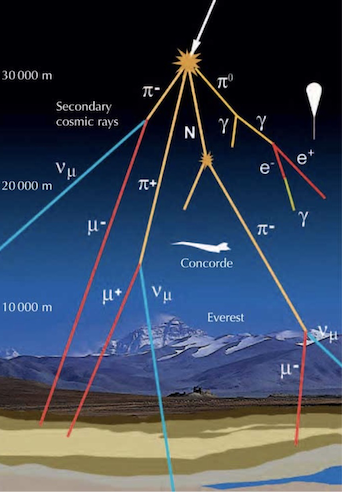

The same nuclear reaction described above (i.e. hadron-hadron impacts to produce pion beams, which then quickly decay to muon beams over short distances) is used by particle physicists to produce muon beams, such as the beam used for the muon g−2 experiment of FermiLab.

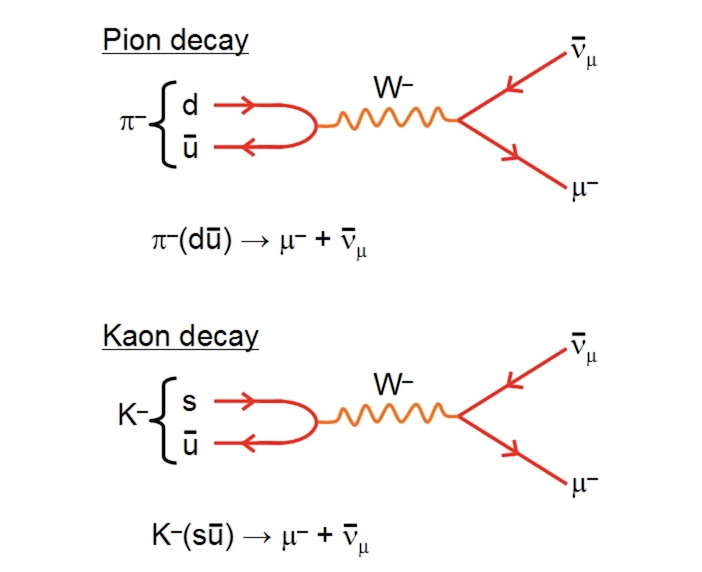

# Description

The production of a high brillance muon beam is one of the most important challenge for the future of Particle Physics.  Low emittance muon beams are a valuable tool for high-energy physics experiments that require high luminosity, precision, and low background noise. A particularly interesting idea consists of shooting high energy positrons on a target, aiming at the production of muons by means of the process $e^{+} + e^{-} ⟶ \mu^{+} + \mu^{-}$ was proposed by the group of INFN in 2015.

To mimize the divergence of the resulting "muon beam", the positrons energy is chosen so that the reaction occurs close to threshold (assuming the electrons in the target to be at rest). The main goal of this project is to produce a Monte Carlo simulation of such a process.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.integrate import quad
from scipy import optimize
import pandas as pd
from scipy.stats import norm
%matplotlib inline
import numpy.random as npr
npr.seed(143)

In [ ]:
# Global Constants
speed_of_light = 299792458 # m/s
electron_mass = 0.0005109989461 # GeV
electron_charge = 1.602176634e-19 # C
alpha = 0.007297 # dimensionless (fine structure constant)
muon_mass = 0.105658374524 #GeV

E_factor = 0.005#1  # the energy beyond treshold
E_cm = 2*muon_mass  + E_factor # check for the extra term --- E_cm = np.srqt(p_f**2 + m_c**2) + np.srqt(p_f**2 + m_d**2)

# Convert units
c0 = 0.389379e6 #1/GeV to nanoBarn (energy)

#Cross Section and Angular Distribution



---


1. Compute the process leading-order cross section, $\sigma(\theta, \sqrt{s})$, as a function of the scattering angle $\theta$ and with the center of mass energy $\sqrt{s}$ as a parameter. Start by computing it in the center of mass system. N.B.: textbooks reports such cross section in the relativistic limit, i.e. for $\sqrt{s} ≫ m_{\mu}$, which is clearly not the case here $(\sqrt{s} ∼ 2m_{\mu})$;


---



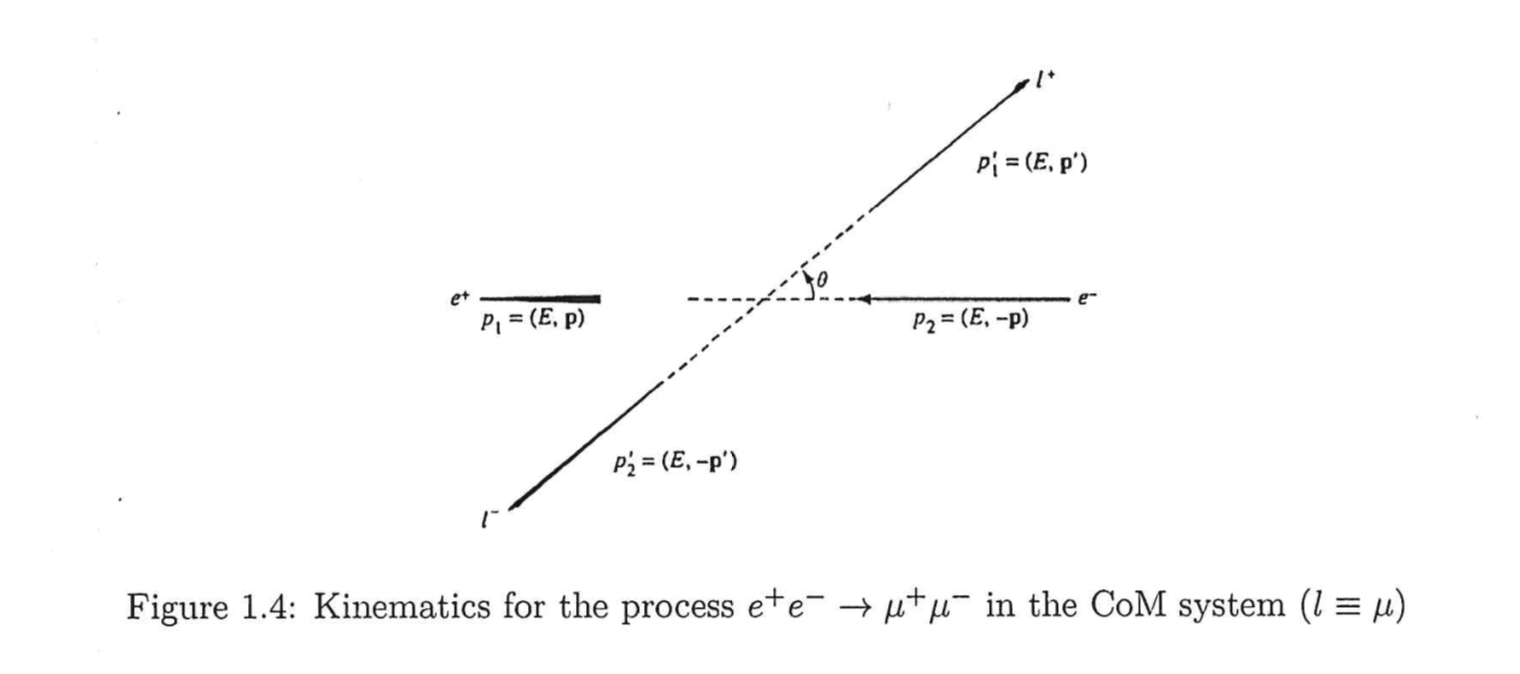

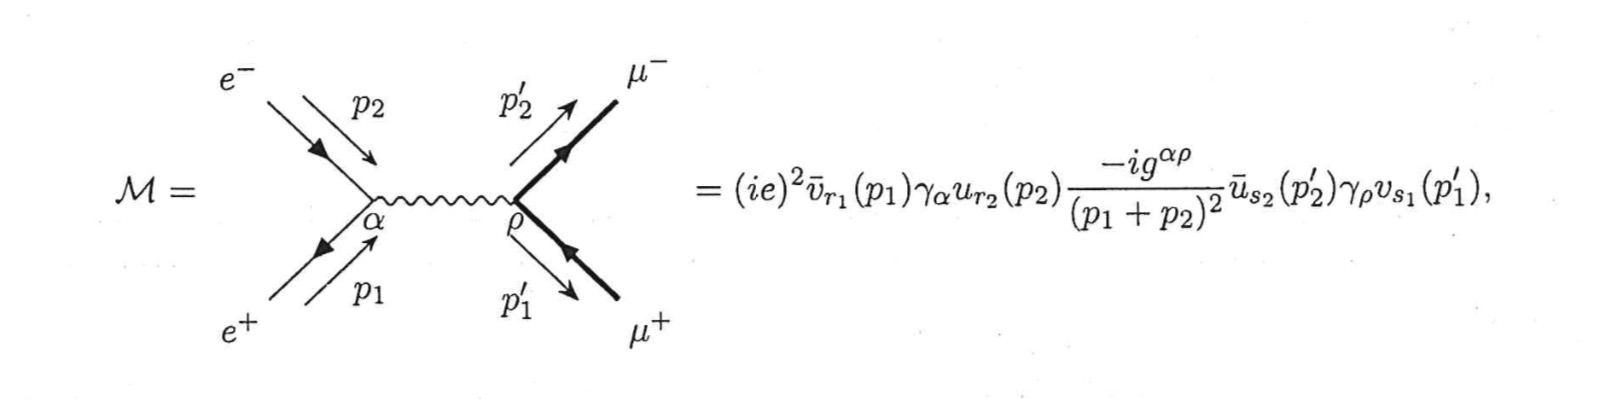

In the CoM frame, taking the limit $m_{e}\to 0  (p\to E)$(in the energy range under our consideration $m_{e}$ is neglectable, however not the case for $m_{\mu}$), we find \
\
\begin{equation}
\frac{d\sigma}{d\Omega}|_{CoM}=\frac{\alpha^2}{16E^4}(\frac{p'}{E})(E^2+m_{\mu}^2+p'^2cos^2\theta)
\end{equation}
\
where $p'^2 = E^2-m_{\mu}^2$. 
Let $s=(2E)^2$, we can get \
\
\begin{equation}
\frac{d\sigma}{d\Omega}|_{CoM}=\frac{\alpha^2}{4s}(\sqrt{1-\frac{4m_{\mu}^2}{s}})[(1+\frac{4m_{\mu}^2}{s})+(1-\frac{4m_{\mu}^2}{s})cos^2\theta)]
\end{equation}
\
To intergrate over $\Omega$ we can get the total cross section and its relation to the total energy $\sqrt{s}$ in CoM frame$^{[1]}$ \
\
\begin{equation}
\sigma_{Tot}=\int_{-1}^{1}(cos\theta)\int_{0}^{2π}\phi \frac{d\sigma}{d\Omega}=\frac{4\pi\alpha^2}{3s}\sqrt{1-\frac{4m_{\mu}^2}{s}}(1+\frac{2m_{\mu}^2}{s})
\end{equation}

In [ ]:
# define cross section function (theta, E_cm)
def total_cross_section(E_cm):
    """returns the total cross sectin in nb"""
    s = np.power(E_cm,2)
    return ((4*np.pi*alpha**2)/(3*s))*np.sqrt(1-4*muon_mass**2/s)*(1+2*muon_mass**2/s) * c0

def differential_cross_section(theta, s=E_cm**2):
    """returns the differential cross section in nb"""
    return (((alpha**2)*np.pi*2/(4*s))*np.sqrt(1-(4*muon_mass**2/s))*((1+(4*muon_mass**2/s))+(1-(4*muon_mass**2/s))*np.cos(theta)**2))*c0


In [ ]:
print("The energy in CoM is: ", E_cm , "GeV")
print("The total cross section is: ", total_cross_section(E_cm), "nb")

The energy in CoM is:  0.216316749048 GeV
The total cross section is:  586.0378845408211 nb


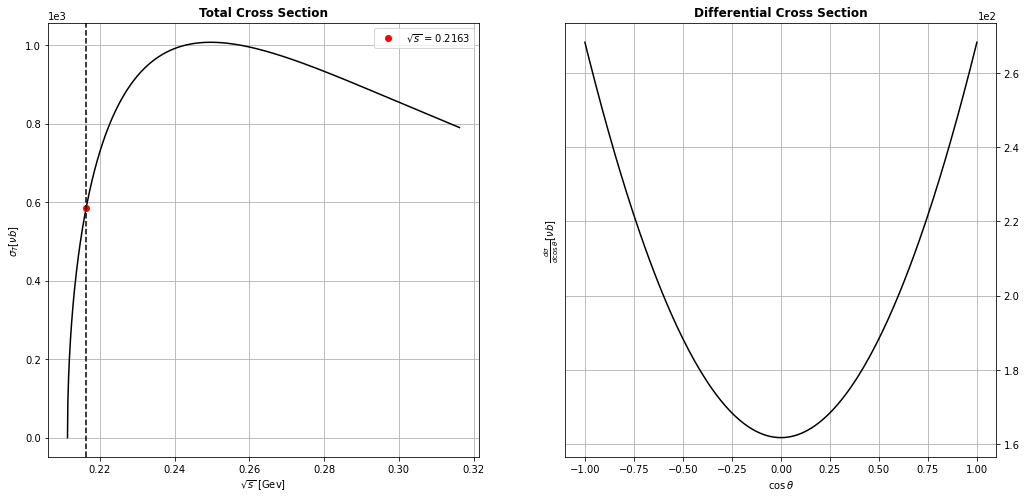

In [ ]:
def degrees_to_rads(x):
    return x*np.pi/180
    
#rad in degrees
rad = np.arange(0,181)
#theta in degrees
theta = degrees_to_rads(rad)

#plot total cross section and differential cross section with respect of center of mass energy and cos(theta) respectively
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(17,8))

#Differential cross section 
ax[1].plot(np.cos(theta), differential_cross_section(theta, E_cm), "k")
ax[1].set_xlabel(r"$\cos{\theta}$")
ax[1].set_ylabel(r"$\frac{d\sigma}{d\cos{\theta}} [\nu b]$")
ax[1].yaxis.tick_right()
ax[1].set_title("Differential Cross Section", fontweight= "bold")
ax[1].ticklabel_format(style='sci',scilimits=(-2,2))
ax[1].grid()

#Cross section with different values of energy
x1 = np.arange(2*muon_mass, E_cm + 0.1, 0.0001)# +0.1 to see higher energy  behavior
y1 = total_cross_section(x1)
ax[0].set_ylabel(r"$\sigma_T [\nu b]$" )
ax[0].set_xlabel(r"$\sqrt{s}$ [Gev]")
ax[0].set_title("Total Cross Section", fontweight= "bold")
ax[0].plot(x1,y1, color="black")
ax[0].plot(E_cm, total_cross_section(E_cm), "ro", label=r"$\sqrt{s}$ = " + '{}'.format(round(E_cm,4)))
ax[0].axvline(x = E_cm, color="black", linestyle="--")
ax[0].legend()
ax[0].ticklabel_format(style='sci',scilimits=(-3,3))
ax[0].grid()

#Emerging muon pairs



---


2. compute and display the angle and momentum components distributions of the emerging muon pairs


---



To  get the Probability Density Distribution for the scattering angle, we only intergrate out $\phi$ 
\
\begin{equation}
P(\theta)=2π sin\theta \frac{d\sigma}{d\Omega}
\end{equation}
\
By overing total cross section, we get the normalized Probabilty Density Distribution
\
\begin{equation}
\rho(\theta)=\frac{1}{\sigma_{Tot}}\frac{d\sigma}{d\theta}
\end{equation}

The normalization value is:  3682.184625597494


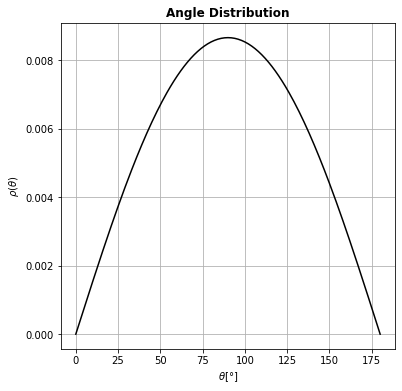

In [ ]:
#Compute angle distribution
def theta_distribution(angle, s=E_cm**2):
    return 2*np.pi*np.sin(angle)*differential_cross_section(angle, s)

#Compute integral value of theta from 0 to pi
integral, value = quad(lambda x: theta_distribution(x), 0, np.pi)
print("The normalization value is: ", integral)

#Normalization of theta distribution
def theta_distribution_normalized(angle,n_factor, energy):
    energy = energy**2 
    return(1/n_factor)*theta_distribution(angle*np.pi/180,energy)*np.pi/180

#Plot distribution of theta with E_factor=0.001
fig, axis = plt.subplots(nrows= 1, ncols=1, figsize= (6,6))
axis.plot(rad, theta_distribution_normalized(rad,integral, E_cm), "k")
axis.set_xlabel(r"$\theta[\degree]$" )
axis.set_ylabel(r"$\rho(\theta) $")
axis.set_title("Angle Distribution", fontweight= "bold")
axis.grid()

The maximum and minimum energies of the muons produced at the positron target are given by

\begin{equation}
E_{max} = \frac{s}{8m_{e}}(1+\sqrt{1-\frac{4m_{\mu}^{2}}{s}})
\end{equation}
\
\begin{equation}
E_{min} = \frac{s}{8m_{e}}(1-\sqrt{1-\frac{4m_{\mu}^{2}}{s}})
\end{equation}

The difference between the maximum and the minimum energy of the muons $\Delta E_{\mu}$ depends on $\sqrt{s}$
\begin{equation}
\Delta E_{\mu} = \frac{\sqrt{s}}{2m_{e}}\sqrt{\frac{s}{4}-m_{\mu}^2}
\end{equation}

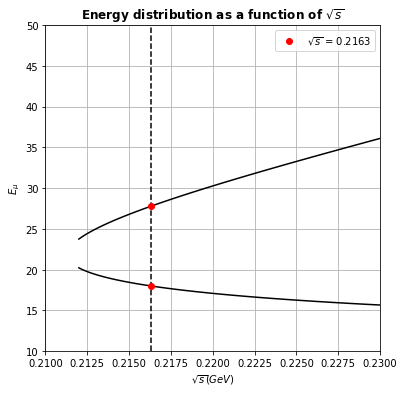

In [ ]:
#compute the maximum energy
def energy_max(s=E_cm**2):
    return s/(4*electron_mass)*(1 + np.sqrt(1 - 4*muon_mass**2/s))

#compute the minimum energy
def energy_min(s=E_cm**2):
    return s/(4*electron_mass)*(1 - np.sqrt(1 - 4*muon_mass**2/s))

energy_cm = np.linspace(0.212,0.230,100)
s_cm = energy_cm**2

#plot maximum theta for E from 0.212GeV to 0.23GeV
fig, axis = plt.subplots(nrows= 1, ncols=1, figsize= (6,6))
axis.plot(energy_cm, energy_max(s_cm), "k")
axis.plot(energy_cm, energy_min(s_cm), "k")
axis.set_xlabel(r"$\sqrt{s} (GeV)$" )
axis.set_ylabel(r"$E_{\mu} $")
axis.set_title(r"Energy distribution as a function of $\sqrt{s}$", fontweight= "bold")
axis.axvline(x = E_cm, color="black", linestyle="--")
axis.plot(E_cm, energy_min(s=E_cm**2), "ro", label=r"$\sqrt{s}$ = " + '{}'.format(round(E_cm,4)))
axis.plot(E_cm, energy_max(s=E_cm**2), "ro")
plt.xlim([0.21,0.23])
plt.ylim([10,50])
axis.legend()
axis.grid()

Given the consideration the angles are quite small, the fly-out polar angles of the muons are approximately  

\begin{equation}
\theta \approx P_{\perp}/P_{\parallel}
\end{equation}

And the maximum scattering angle also depends on $\sqrt{s}$

\begin{equation}
\theta_{\mu}^{max} \approx \frac{4m_{e}}{s}\sqrt{\frac{s}{4}-m_{\mu}^2}
\end{equation}

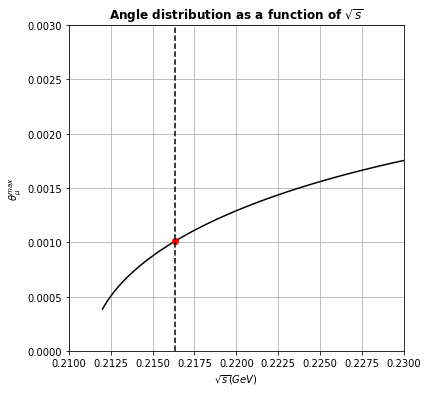

In [ ]:
#compute the maximum angle according to energy in com
def theta_max(s=E_cm**2):
    return 4*electron_mass/s*np.sqrt(s/4-muon_mass**2)

energy_cm = np.linspace(0.212,0.230,100)
s_cm = energy_cm**2

#plot maximum theta for E from 0.212GeV to 0.23GeV
fig, axis = plt.subplots(nrows= 1, ncols=1, figsize= (6,6))
axis.plot(energy_cm, theta_max(s_cm), "k")
axis.set_xlabel(r"$\sqrt{s} (GeV)$" )
axis.set_ylabel(r"$\theta_{\mu}^{max} $")
axis.set_title(r"Angle distribution as a function of $\sqrt{s}$", fontweight= "bold")
axis.plot(E_cm, theta_max(s=E_cm**2), "ro", label=r"$\sqrt{s}$ = " + '{}'.format(round(E_cm,4)))
axis.axvline(x = E_cm, color="black", linestyle="--")
plt.xlim([0.21,0.23])
plt.ylim([0,0.003])
axis.grid()

In [ ]:
#definition of momenta of center of mass framework
def CoM_framework(s, theta, phi):
    cm_momentum = np.sqrt(s**2 - muon_mass**2) #GeV
    x_momentum = cm_momentum * np.sin(theta) * np.cos(phi)  
    y_momentum = cm_momentum * np.sin(theta) * np.sin(phi)    
    z_momentum = cm_momentum * np.cos(theta)
    return x_momentum, y_momentum, z_momentum

#Lorentz Transformation



---


3. boost muons four-momenta in the laboratory frame, i.e. in the frame where the electron is at rest and the positron has enough energy to give rise to the process;


---



To transform four-momenta from the CoM frame to the Lab frame with relative velocity $\vec v$ along the direction of the z-axis is given by$^{[2]}$ \

\begin{equation}
\left\{
\begin{aligned}
E'&=Eγ-γβp_{z}, \\
p_{x}'&=p_{x}, \\
p_{y}'&=p_{y}, \\
p_{z}'&=γp_{z}-γβE. \\
\end{aligned}
\right.
\end{equation}
\
where 
\begin{equation}
β=-\sqrt{1-\frac{4m_{e}^2}{s}}
\end{equation}
and 
\begin{equation}
γ=\frac{1}{\sqrt{1-\beta^2}}
\end{equation}

In [ ]:
# parameters
#beta = - np.sqrt(1. - (4*electron_mass**2)/s**2)
#gamma = 1/np.sqrt(1. - beta**2)

def CoM_to_Lab(s, gamma, beta, theta, phi):
    """return x,y,z momentum for muon and anti muon and energy
    """
    CoM = CoM_framework(s, theta, phi)
    cm_momentum = np.sqrt(s**2 - muon_mass**2) #GeV
    x_momentum = CoM[0]                         #p_x is the same in CoM and Lab framework
    y_momentum = CoM[1]                         #p_y is the same in CoM and Lab framework
    z_momentum = -gamma * (CoM[2] + beta*s)
    anti_z_momentum = gamma * (CoM[2] - beta*s)                 
    E = gamma * (s - beta*CoM[2])    
    return x_momentum, y_momentum, z_momentum, anti_z_momentum, E

#Monte Carlo



---


4. write a Monte Carlo simulation that generates scattering events following the distrubtions that you found analytically;


---



**REJECTION SAMPLING**

Number of points used for integration: 55404


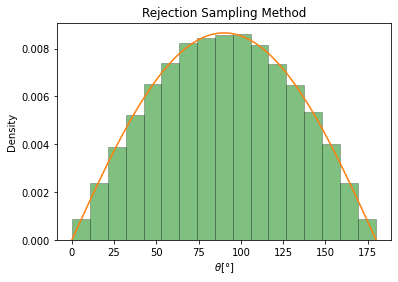

In [ ]:
#npr.seed(143+1)

# MC Rejection Sampling method

# Set the number of points
n_points = 100000

# Generate random x (for theta) values
x_min = rad.min()
x_max = rad.max()
x_values = np.random.uniform(x_min, x_max, n_points)

# Generate random y (for pdf)
y_min = 0.
y_max = 0.01
y_values = np.random.uniform(y_min, y_max, n_points)

# Find the fraction of points that fall below the function
x_values_accepted = x_values[y_values < theta_distribution_normalized(x_values,integral, E_cm)]

# Plot the results

plt.hist(x_values_accepted, bins='doane', density=True, edgecolor='black', linewidth=0.5, facecolor='g', alpha=0.5)
plt.plot(theta_distribution_normalized(rad,integral, E_cm))
plt.title("Rejection Sampling Method")
plt.xlabel(r"$\theta[\degree]$")
plt.ylabel("Density")

# Print the result
print("Number of points used for integration:", len(x_values_accepted))

**INVERSE TRANSFORM METHOD**

$$
CDF = \int_{0}^{\theta} p(\theta') d\theta' 
$$

where $p(\theta)=2π sin\theta \frac{d\sigma}{d\Omega}$

Number of points used for integration: 100000


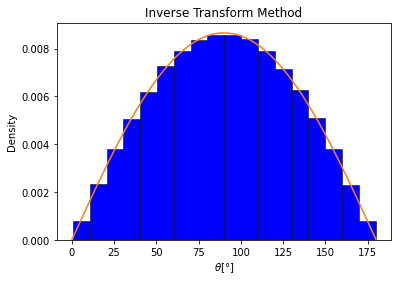

In [ ]:
#Inverse transform method
#Compute the integral of the pdf function and write cos(theta)==x
def cum_function(x,s=(E_cm)**2):
    #s=(E_cm)**2
    A=(2*np.pi*alpha**2/(4*s))*(np.sqrt(1-(4*muon_mass**2)/s))*c0
    B=(1+(4*muon_mass**2)/s)
    C=(1-(4*muon_mass**2)/s)
    return (A*B +A*C/3 -A*B*x - (A*C*x**3)/3)/total_cross_section(np.sqrt(s)) #E_cm
#As it is nearly difficult to compute the value of x, just add the value of y (uniform sampling) and find the roots
def pseudo_inverse_cum_function(x,y,s):
    return cum_function(x,s)-y

#Generate uniform values for y (0,1)
normal_values=np.random.uniform(0,1,n_points)
N=[]
#Compute x for y given values
#for y in normal_values:
#    n=optimize.brentq(pseudo_inverse_cum_function, -1, 1, y)
#    N.append(n)
N = [optimize.brentq(pseudo_inverse_cum_function, -1, 1, (y,s)) for y,s in zip(normal_values,[E_cm**2]*n_points)]
N=np.array(N)

#Revert the change and plot
plt.hist(180*np.arccos(N)/np.pi, bins='doane', density="True", edgecolor='black', facecolor='b',linewidth=0.5)
plt.plot(theta_distribution_normalized(rad,integral, E_cm))
plt.title("Inverse Transform Method")
plt.xlabel(r"$\theta[\degree]$")
plt.ylabel("Density")

# Print the result
print("Number of points used for integration:", len(180*np.arccos(N)/np.pi))



---


5. produce a synthetic dataset of about $N=10^5$ (or more) events. Events should be listed as rows in a file with columns representing the muons coordinates (keep in mind that in the lab frame muons are relativistic and thus the number of coordinates can be only 3 per muon);


---



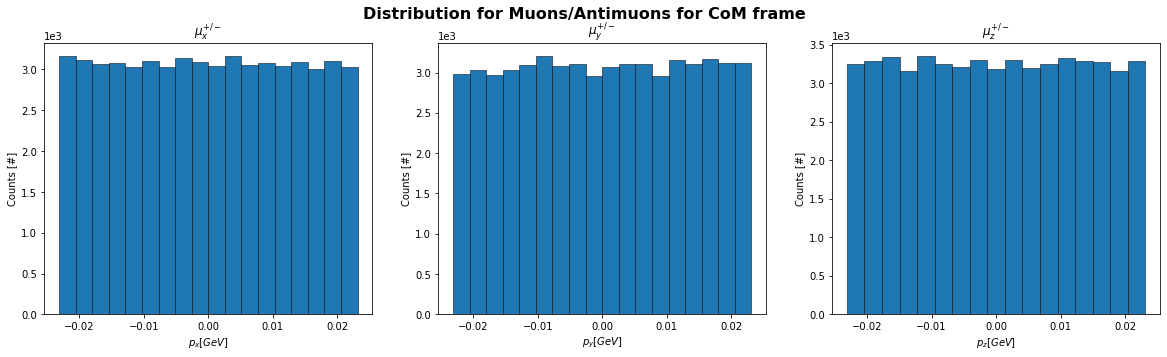

In [ ]:
npr.seed(143+2)
# synthetic dataset

theta_samples = x_values_accepted * np.pi/180
phi = np.random.uniform(0, 360, len(theta_samples))* np.pi/180

energy = E_cm/2 # splited by 2 to use one particle energy

# CoM frame
CoM_momenta = CoM_framework(energy, theta_samples, phi)

#Plot distribution
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
fig.suptitle('Distribution for Muons/Antimuons for CoM frame', fontsize=16, fontweight= "bold")

for i,axis in enumerate(['x','y','z']):
    ax[i].hist(CoM_momenta[i], bins='doane', edgecolor='black', linewidth=0.5,)
    ax[i].set_title(r"$\mu^{}_{}$".format('{+/-}',axis), fontweight= "bold")
    ax[i].set_xlabel(r"$p_{} [GeV]$".format(axis))
    ax[i].set_ylabel("Counts [#]")
    ax[i].ticklabel_format(style='sci',scilimits=(-3,3))

In [ ]:
np.sin(theta_samples).min()

0.00444629546718383

-0.9999888392820437
211.6606606515514


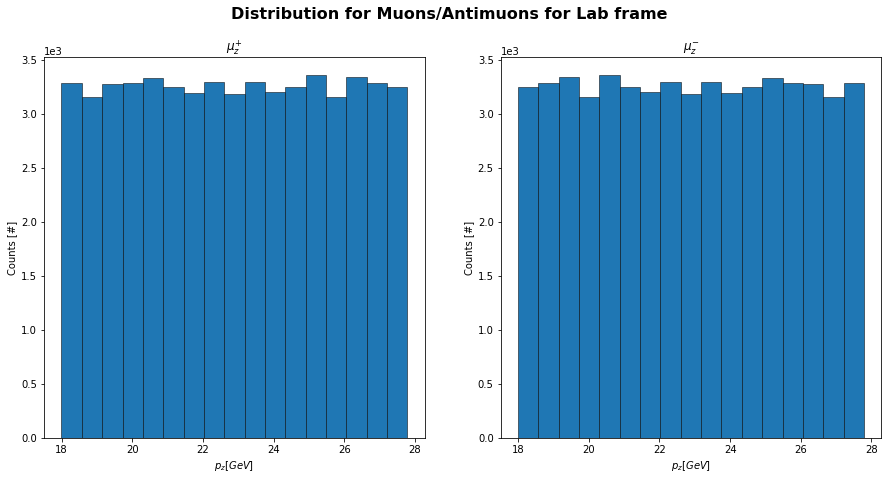

In [ ]:
# parameters
beta = - np.sqrt(1. - (4*electron_mass**2)/((2*energy)**2))
gamma = 1/np.sqrt(1. - beta**2)
print(beta)
print(gamma)

# Lab frame
x_momentum_lab, y_momentum_lab, z_momentum_lab, anti_z_momentum_lab, E_lab  = CoM_to_Lab(energy, gamma, beta, theta_samples, phi)

# store the muons coordinates
momenta_lab = pd.DataFrame(
    { 'Muon_px_lab' : - x_momentum_lab,
      'Muon_py_lab' : - y_momentum_lab,
      'Muon_pz_lab' : z_momentum_lab,
      'Anti_muon_px_lab' : x_momentum_lab,
      'Anti_muon_py_lab' : y_momentum_lab,
      'Anti_muon_pz_lab' : anti_z_momentum_lab,
    }
    )

#Plot distribution
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,7))
fig.suptitle('Distribution for Muons/Antimuons for Lab frame', fontsize=16, fontweight= "bold")

ax[0].hist(momenta_lab.iloc[:,2], bins='doane', edgecolor='black', linewidth=0.5,)
ax[0].set_title(r"$\mu^{+}_{z}$", fontweight= "bold")
ax[0].set_xlabel(r"$p_z [GeV]$")
ax[0].set_ylabel("Counts [#]")
ax[0].ticklabel_format(style='sci',scilimits=(-3,3))

ax[1].hist(momenta_lab.iloc[:,-1], bins='doane', edgecolor='black', linewidth=0.5,)
ax[1].set_title(r"$\mu^{-}_{z}$", fontweight= "bold")
ax[1].set_xlabel(r"$p_z [GeV]$")
ax[1].set_ylabel("Counts [#]")
ax[1].ticklabel_format(style='sci',scilimits=(-3,3))

#fig.supxlabel('Momentum', fontsize=16, fontweight= "bold")
#fig.supylabel('Counts', fontsize=16, fontweight= "bold")

In [ ]:
#plt.scatter(np.linspace(0,E_cm,len(np.sin(theta_samples))), np.sin(theta_samples))
                        #len(np.arctan(y_momentum_lab/z_momentum_lab))),np.sin(np.arctan(y_momentum_lab/z_momentum_lab)))

In [ ]:
#plt.plot(np.linspace(E_cm,0.23),np.linspace(np.sin((4*electron_mass/E_cm**2)*np.sqrt(E_cm**2/4 - muon_mass**2)),np.sin((4*electron_mass/0.23**2)*np.sqrt(0.23**2/4 - muon_mass**2))))
#plt.ticklabel_format(style='sci',scilimits=(-2,0))

In [ ]:
momenta_lab['total momentum'] = momenta_lab['Anti_muon_pz_lab'] + momenta_lab['Muon_pz_lab']

In [ ]:
momenta_lab.head(10)

,Muon_px_lab,Muon_py_lab,Muon_pz_lab,Anti_muon_px_lab,Anti_muon_py_lab,Anti_muon_pz_lab,total momentum
0,0.003497,-0.016601,26.217294,-0.003497,0.016601,19.567941,45.785235
1,-0.020257,-0.000258,20.534484,0.020257,0.000258,25.250751,45.785235
2,0.022581,0.004393,22.402863,-0.022581,-0.004393,23.382372,45.785235
3,-0.019771,-0.010928,23.934903,0.019771,0.010928,21.850332,45.785235
4,0.000368,0.000521,18.000852,-0.000368,-0.000521,27.784383,45.785235
5,-0.001507,0.011500,18.659247,0.001507,-0.011500,27.125988,45.785235
6,0.014520,0.010292,19.769049,-0.014520,-0.010292,26.016186,45.785235
7,0.010437,-0.019959,23.997433,-0.010437,0.019959,21.787802,45.785235
8,0.006467,0.018918,20.435024,-0.006467,-0.018918,25.350211,45.785235
9,0.016928,-0.000495,19.561247,-0.016928,0.000495,26.223988,45.785235


In [ ]:
# save dataset (1)
momenta_lab.to_csv('momenta_lab_N1e6.csv')

#Experimental Simulations

---
6. assume a 3 cm thick Beryllium block is used as target and a rate of positron on target of $10^6 Hz$. Compute the rescaling factor (weight) you need to apply to the $N$ simulated events such that they represent the statistics that would be gathered in a week of countinuous operations;

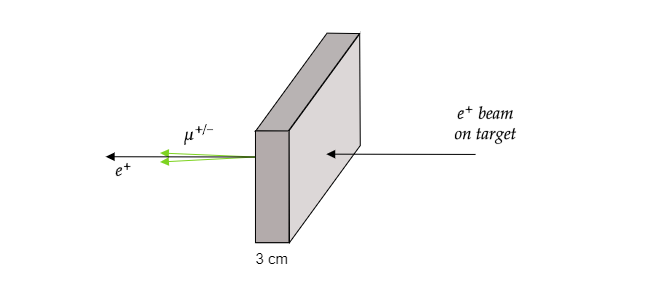

---

Number of muon pairs produced per $e^{+}e^{-}$ interaction is given by$^{[3]}$
\begin{equation}
N(\mu^+\mu^-)=\sigma(e^{+}e^{-}\rightarrow\mu^+\mu^-)N(e^+)\rho(e^-)L
\end{equation}  
where 
\begin{equation}
N(e^+)=\lambda_{e^+}T
\end{equation}

$N(e^+)$ = number of positron \
$\lambda_{e^+}$ = rate of positron \
$T$ = time of the experiment

and
\begin{equation}
\rho(e^-)=\frac{\rho_{Be}N_A}{M_{Be}}
\end{equation}

$\rho(e^-)$ = target electron density \
$\rho_{Be}$ = Beryllium density \
$N_A$ = Avogadro constant \
$M_{Be}$ = Beryllium molar mass

$L$ = the target thickness.

In [ ]:
# constants
target_density = 1.85 # g/cm^3 
target_mollarmass = 9.012 # g/mol
N_A = 6.023e23 # Avogadro number 1/mol
target_atomic_number = 4 
target_thickness = 3 # cm
time = 60*60*24*7 # s in a week
rate_of_positron = 1e6 # 1/s

target_electron_density = N_A * target_density / target_mollarmass # number of atoms per unit volume

print('Density of electron:', target_electron_density)

Density of electron: 1.236412561029738e+23


In [ ]:
n_points

100000

In [ ]:
# compute the number of muons pairs per electron interaction

# 1e-33 nbarn to cm^2
N_target = total_cross_section(E_cm) * time * rate_of_positron* target_electron_density * target_atomic_number * target_thickness * 1e-33
rescaling_factor = N_target/n_points #momenta_lab.shape[0]

print("Rescaling factor of Beryllium: ","{:.5f}".format(rescaling_factor))

Rescaling factor of Beryllium:  5.25875




---


7. repeat what done so far simulating now the actual transverse shape and energy spread of the beam: for the former assume a flat distribution in a circle of radius $r=1 cm$ and for the latter a gaussian distribution centered at the nominal beam energy and a width of $0.5 GeV$;


---



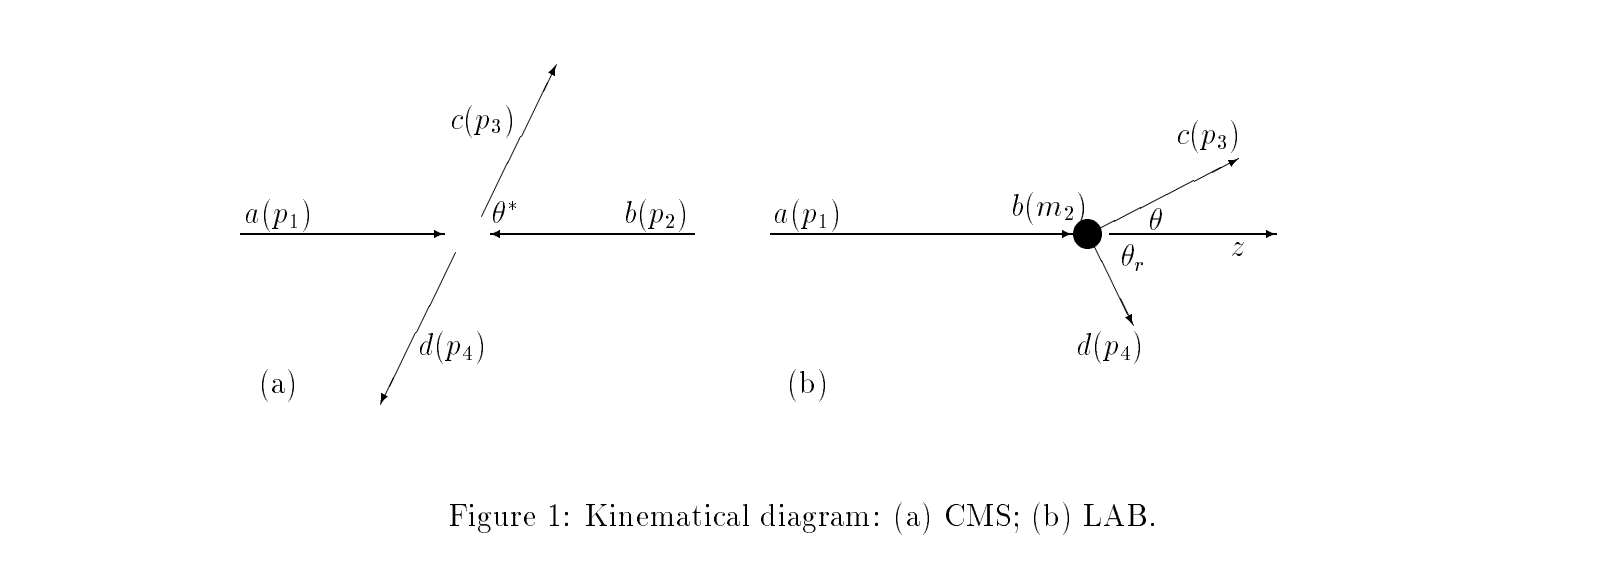

The four-momentum for positron in Lab frame is given by$^{[4]}$ 
\
\begin{equation}
p_1 = (E_{Lab},0,0,p_{Lab})
\end{equation}
\
and the 4-momentum of the target electron is given by
\
\begin{equation}
p_2 = (m_{e},0,0,0)
\end{equation}
\
The conserved energy in the Lab frame is therefore
\
\begin{equation}
p_\mu p^{\mu} = 2m_{e}^{2}+2m_{e}E_{Lab}
\end{equation}
\
And the threshold energy in the Lab frame is given by
\
\begin{equation}
p_\mu p^{\mu}_{thr} = 4m_{\mu}^{2}
\end{equation}
\
Finally, we have the expression for energy of positron beam we use experimentally
\begin{equation}
E_{Lab} = \frac{4m_{\mu}^{2}-2m_{e}^{2}}{2m_{e}}
\end{equation}

Central energy value for incoming positron beam (CoM):  0.107 GeV
Central energy value for incoming positron beam (Lab):  44.733 GeV


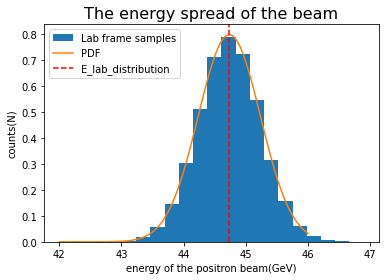

In [ ]:
npr.seed(143+3)
# gaussian distribution centered at the nominal beam energy
N = n_points #100000
energy_spread = 0.5 # GeV

E_exp=2*muon_mass + 0.005
E_exp=E_exp-0.0025
print("Central energy value for incoming positron beam (CoM): ","{:.3f}".format(E_exp/2), "GeV")
# Calculate relativistic factors
beta_Com = - np.sqrt( 1. - ((2*electron_mass)**2)/(E_exp)**2 )
gamma_Com = 1./np.sqrt(1-beta_Com**2)

# Boost to lab frame
p_z_com=np.sqrt((E_exp/2)**2 - electron_mass**2)
E_lab=gamma_Com*((E_exp/2) - beta_Com*p_z_com)
print("Central energy value for incoming positron beam (Lab): ", "{:.3f}".format(E_lab), "GeV")

#z_momentum = np.sqrt(s**2 - electron_mass**2)
#E_lab = (4*muon_mass**2-2*electron_mass**2)/(2*electron_mass)
#print('The treshold energy for the positron beam in Lab frame is: ', E_lab, 'GeV')

# sample energy from a normal distribution
lab_distribution = np.random.normal(E_lab, energy_spread, N)

#beta_lab = - np.sqrt(1. - (4*electron_mass**2)/lab_distribution**2)
#gamma_lab = 1/np.sqrt(1. - beta_lab**2)
# as in the example
beta_lab = (np.sqrt(lab_distribution**2-electron_mass**2))/(lab_distribution+electron_mass)
gamma_lab = 1./np.sqrt(1-beta_lab**2)

#counts, bins, patches = plt.hist(lab_distribution, bins="doane")

mean = E_lab #np.mean(lab_distribution)
std = energy_spread #np.std(lab_distribution)
distribution = norm(mean, std)
min_weight = min(lab_distribution)
max_weight = max(lab_distribution)
values = np.linspace(int(min_weight), int(max_weight),100)
probabilities = [distribution.pdf(v) for v in values]

# plot the energy of the beam
plt.hist(lab_distribution, bins='doane', density=True, label='Lab frame samples') 
plt.plot(values, probabilities, label='PDF')
plt.axvline(mean, color='red',linestyle='--', label='E_lab_distribution')
plt.xlabel('energy of the positron beam(GeV)')
plt.ylabel('counts(N)')
plt.title('The energy spread of the beam',fontsize=16)
plt.legend(loc='best')
plt.show()

In [ ]:
# back to CoM
e = lab_distribution
energy_CoM = np.sqrt(2*electron_mass*e) 
print('energy_CoM',energy_CoM)


energy_CoM [0.21666028 0.21376999 0.21255289 ... 0.21251761 0.21299329 0.21355064]


In [ ]:
energy_CoM>2*muon_mass

array([ True,  True,  True, ...,  True,  True,  True])

In [ ]:
energy_CoM_filt = energy_CoM[energy_CoM>2*muon_mass]
print('energy_CoM',energy_CoM_filt)

energy_CoM [0.21666028 0.21376999 0.21255289 ... 0.21251761 0.21299329 0.21355064]


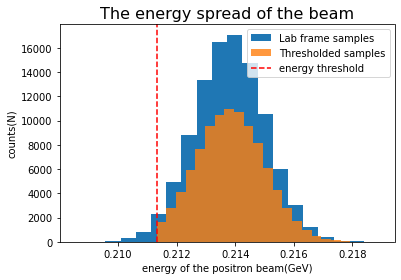

In [ ]:
# plot the energy of the beam
plt.hist(energy_CoM, bins='doane', label='Lab frame samples') 
plt.hist(energy_CoM_filt, bins='doane', label="Thresholded samples", alpha=0.8)
plt.axvline(2*muon_mass, color='red',linestyle='--', label='energy threshold')

plt.xlabel('energy of the positron beam(GeV)')
plt.ylabel('counts(N)')
plt.title('The energy spread of the beam',fontsize=16)
plt.legend(loc='best')


plt.show()

In [ ]:
# angles sampling
#n=optimize.brentq(pseudo_inverse_cum_function, -1, 1, y)
#theta_samples = x_values_accepted * np.pi/180
#phi = np.random.uniform(0, 360, len(theta_samples))* np.pi/180

np.random.seed(311)
x = np.random.uniform(0,1,len(energy_CoM_filt))
z = [optimize.brentq(pseudo_inverse_cum_function,-1,1,args=(x,s)) for x, s in zip(x, energy_CoM_filt**2)]

theta_samples = np.arccos(z)#*180/np.pi
phi = 360*np.random.random(len(energy_CoM_filt))

# setting same dimension
theta_samples = np.asarray(theta_samples)
phi= phi*(np.pi/180)

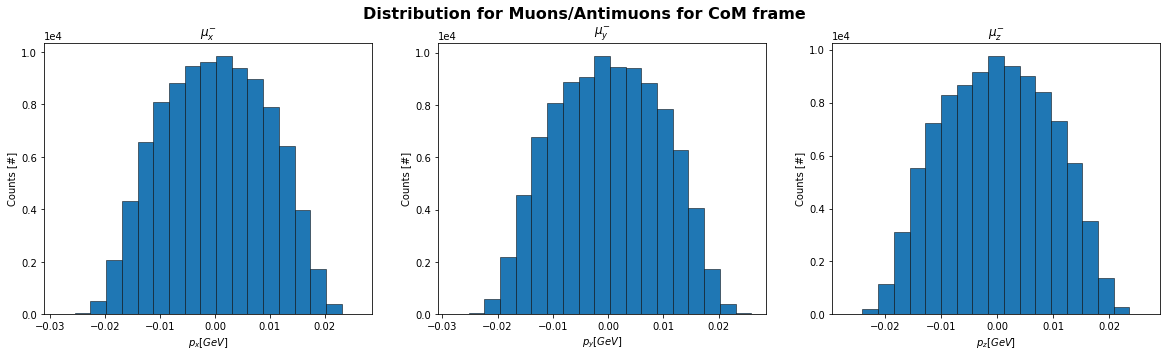

In [ ]:
# CoM frame
CoM_momenta = CoM_framework(energy_CoM_filt/2, theta_samples, phi)

#Plot distribution
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
fig.suptitle('Distribution for Muons/Antimuons for CoM frame', fontsize=16, fontweight= "bold")

for i,axis in enumerate(['x','y','z']):
    ax[i].hist(CoM_momenta[i], bins='doane', edgecolor='black', linewidth=0.5,)
    ax[i].set_title(r"$\mu^{}_{}$".format('{-}',axis), fontweight= "bold") #+/-
    ax[i].set_xlabel(r"$p_{} [GeV]$".format(axis))
    ax[i].set_ylabel("Counts [#]")
    ax[i].ticklabel_format(style='sci',scilimits=(-3,3))

In [ ]:
  # parameters
beta = - np.sqrt(1. - (4*electron_mass**2)/(energy_CoM_filt**2))
gamma = 1/np.sqrt(1. - beta**2)

# CoM frame
#CoM_momenta = CoM_framework(energy_CoM, theta_samples, phi)

# Lab frame
x_momentum_lab, y_momentum_lab, z_momentum_lab, anti_z_momentum_lab, E_lab  = CoM_to_Lab(energy_CoM_filt/2, gamma, beta, theta_samples, phi)
#CoM_array = np.array([x_momentum_lab, y_momentum_lab, z_momentum_lab, anti_z_momentum_lab, E_lab]).T


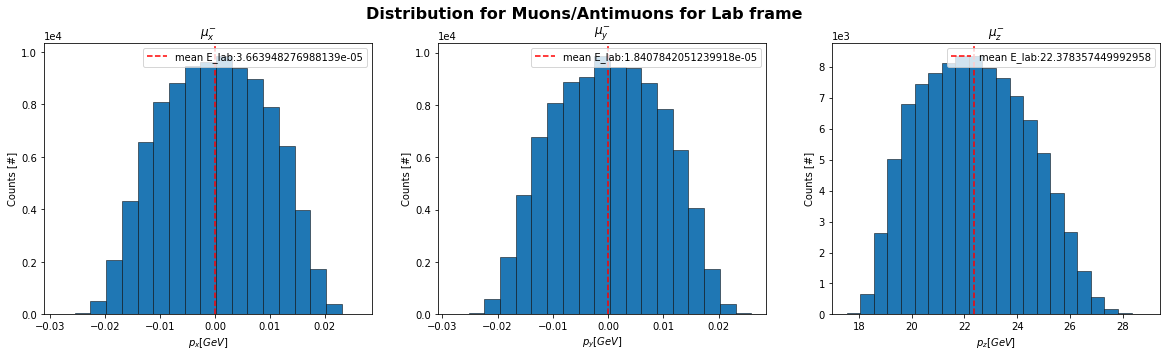

In [ ]:
#Plot distribution
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
fig.suptitle('Distribution for Muons/Antimuons for Lab frame', fontsize=16, fontweight= "bold")

momenta_anti_muon = [x_momentum_lab, y_momentum_lab, anti_z_momentum_lab]

for i,axis in enumerate(['x','y','z']):
    ax[i].hist(momenta_anti_muon[i], bins='doane', edgecolor='black', linewidth=0.5,)
    ax[i].axvline(np.mean(momenta_anti_muon[i]), color='red',linestyle='--', label='mean E_lab:{}'.format(np.mean(momenta_anti_muon[i])))
    ax[i].set_title(r"$\mu^{}_{}$".format('{-}',axis), fontweight= "bold") #+/-
    ax[i].set_xlabel(r"$p_{} [GeV]$".format(axis))
    ax[i].set_ylabel("Counts [#]")
    ax[i].ticklabel_format(style='sci',scilimits=(-3,3))
    ax[i].legend(loc='best')

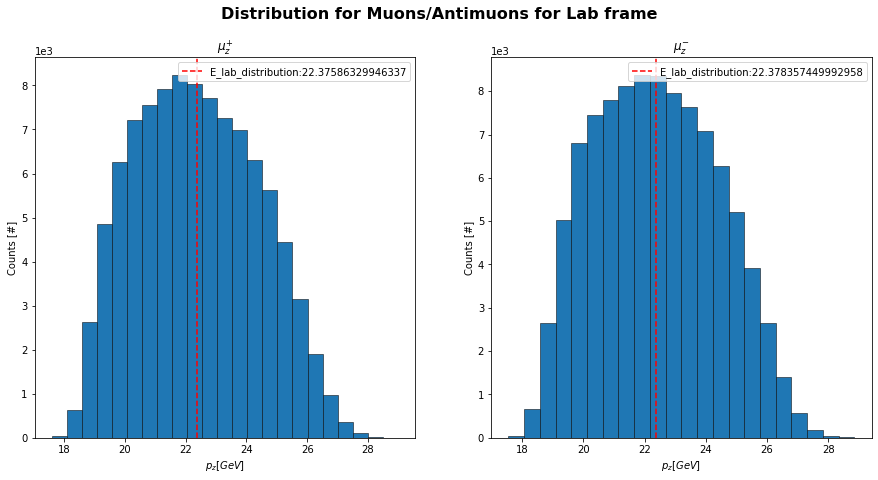

In [ ]:
#Plot distribution
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,7))
fig.suptitle('Distribution for Muons/Antimuons for Lab frame', fontsize=16, fontweight= "bold")

ax[0].hist(z_momentum_lab, bins='doane', edgecolor='black', linewidth=0.5,)
ax[0].axvline(np.mean(z_momentum_lab), color='red',linestyle='--', label='E_lab_distribution:{}'.format(np.mean(z_momentum_lab)))
ax[0].set_title(r"$\mu^{+}_{z}$", fontweight= "bold")
ax[0].set_xlabel(r"$p_z [GeV]$")
ax[0].set_ylabel("Counts [#]")
ax[0].ticklabel_format(style='sci',scilimits=(-3,3))
ax[0].legend(loc='best')

ax[1].hist(anti_z_momentum_lab, bins='doane', edgecolor='black', linewidth=0.5,)
ax[1].axvline(np.mean(anti_z_momentum_lab), color='red',linestyle='--', label='E_lab_distribution:{}'.format(np.mean(anti_z_momentum_lab)))
ax[1].set_title(r"$\mu^{-}_{z}$", fontweight= "bold")
ax[1].set_xlabel(r"$p_z [GeV]$")
ax[1].set_ylabel("Counts [#]")
ax[1].ticklabel_format(style='sci',scilimits=(-3,3))

ax[1].legend(loc='best')

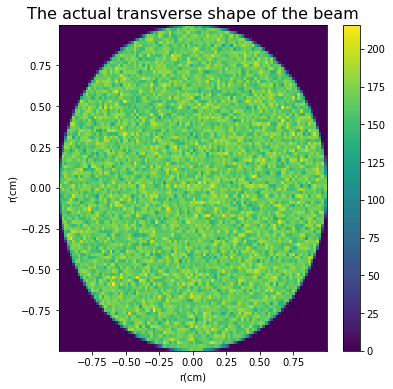

In [ ]:
# flat distribution in a circle of radius
r = 1 # cm
N=N_target
# Generate x and y coordinates 
x_r = np.random.uniform(-1,1, round(N*np.pi))
y_r = np.random.uniform(-1,1, round(N*np.pi))
circle = (x_r*x_r+y_r*y_r)
x = x_r[circle <= r]
y = y_r[circle <= r]

# Plot the transverse shape
fig, ax = plt.subplots(figsize=(6,6))
h = ax.hist2d(x, y, bins=100)#, norm=LogNorm())
fig.colorbar(h[3], ax=ax)
plt.xlabel('r(cm)')
plt.ylabel('r(cm)')
plt.title('The actual transverse shape of the beam',fontsize=16)
plt.show()



---


8. given that the electrons traversing the target lose energy as $E(z) = E_0 \exp{-z}/X_0$ (with z the longitudinal coordinate of the target, the one parallel to the beam direction and $X_0$ is the Beryllium radiation length), compute the nominal beam energy $E_0$ such that muon pairs can be generated along the whole length of the target;


---



The radiation length can be approximated by the following analytical formula$^{[5]}$

\
\begin{equation}
X_{0} = \frac{716.4A}{Z(Z+1)ln\frac{287}{\sqrt{Z}}} g.cm^{-3}
\end{equation}


The value of X0 if beryllium is: 35.13970281753733 cm 

The nominal beam energy required for the treshold reaction to happen(MeV) is: 47.58718438606421 [GeV]


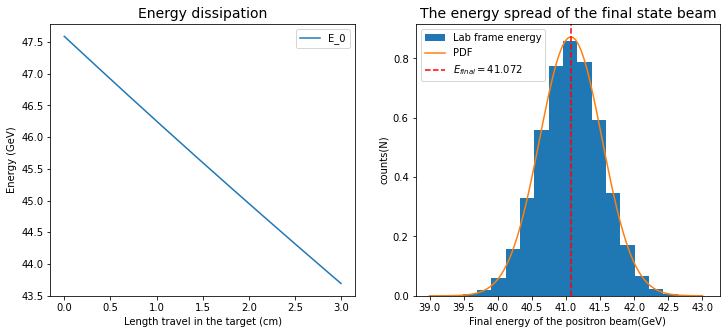

In [ ]:
target_density = 1.85 # g/cm^3 
target_mollarmass = 9.012 # g/mol
target_atomic_number = 4 #Beryllium atomic number
N_A = 6.023e23 # Avogadro number 1/mol
target_thickness = 3 # cm
time = 60*60*24*7 # s in a week
E_lab = (4*muon_mass**2-2*electron_mass**2)/(2*electron_mass)
##The radiation length of a material is the mean length (in cm) to reduce the energy of an electron by the factor 1/e.

def radiation_length(Z, A):
    return 1433*(A/(Z*(Z+1)*(11.319-np.log(Z))))/target_density

def energy_reduction(z,E0,X0):
    return(E0*np.exp(-z/X0))

def energy_rcomputing(z,E,X0):
    return(E*np.exp(+z/X0))

X0 = radiation_length(target_atomic_number, target_mollarmass)
print('The value of X0 if beryllium is:', X0, 'cm \n')

#he LEMMA project [3] aims to study the possibility of producing muons from the e+e−
#annihilation process. The idea is to use a high intensity positron beam, above the production energy
#threshold at 43.7 GeV,

nominal_energy = energy_rcomputing(target_thickness, E_lab, X0)
print('The nominal beam energy required for the treshold reaction to happen(MeV) is:', nominal_energy, '[GeV]')

# plot energy dissipation and spread
fig, axis =plt.subplots(nrows=1, ncols=2, figsize=(12,5))

length = np.linspace(0, target_thickness, 1000)

axis[0].plot(length, energy_reduction(length, nominal_energy, X0), label='E_0')
#axis[0].plot(length, energy_reduction(length, nominal_energy+500000, X0), label='E_0 + 5e5')
#axis[0].plot(length, energy_reduction(length, nominal_energy+1000000, X0), label='E_0 + 1e6')
axis[0].set_xlabel('Length travel in the target (cm)')
axis[0].set_ylabel('Energy (GeV)')
axis[0].set_title('Energy dissipation', fontsize=14)
axis[0].legend(loc='best')

final_energy = energy_reduction(3, lab_distribution, X0)

mean = np.mean(final_energy)
std = np.std(final_energy)
distribution = norm(mean, std)
min_weight = min(final_energy)
max_weight = max(final_energy)
values = np.linspace(int(min_weight), int(max_weight),100)
probabilities = [distribution.pdf(v) for v in values]

# plot the energy of the beam

axis[1].hist(final_energy, bins='doane', density=True, label='Lab frame energy')
axis[1].plot(values, probabilities, label='PDF')
axis[1].axvline(mean, color='red',linestyle='--', label=r'$E_{final}=$'+'{}'.format(round(mean,3)))
axis[1].set_xlabel('Final energy of the positron beam(GeV)')
axis[1].set_ylabel('counts(N)')
axis[1].set_title('The energy spread of the final state beam',fontsize=14)
plt.legend()
plt.show()



---


9. (optional) take the former point into account when generating the events (i.e. the proccess $\sqrt{s}$ depend on the position along the target where the $e^{+} - e^{-}$ scattering occurrs.


---



---



()

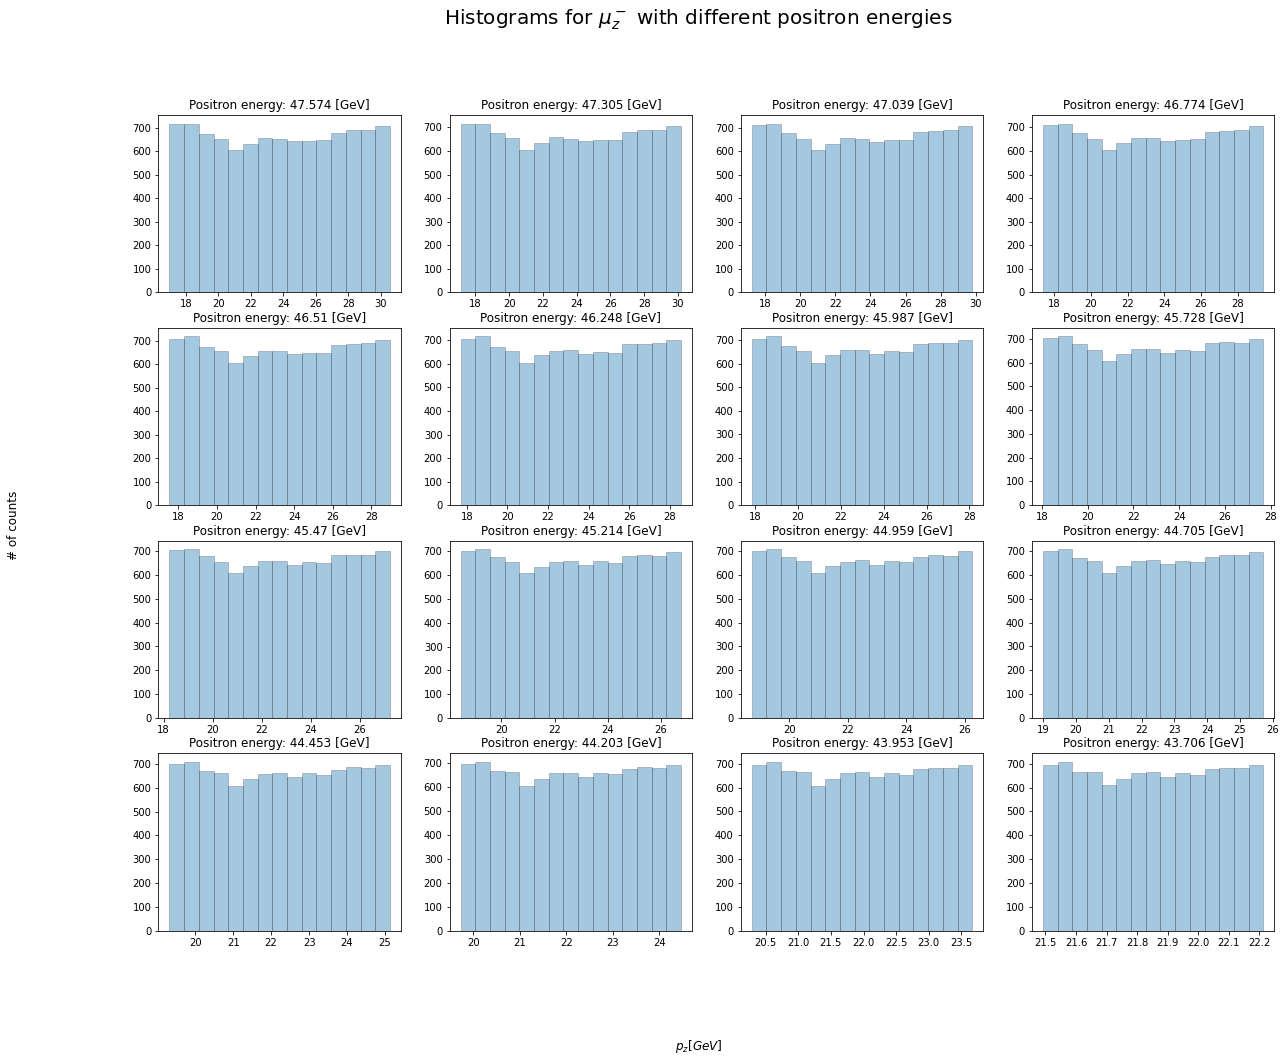

In [ ]:
def muon_generator( minimum_energy, number_of_layers, samples):
    #Divide target in number_of_layers layers 
    layers = np.linspace(0.01,2.99, number_of_layers)
    #Assume there will be N collisions per layer
    #Compute new positron energy per each layer due to energy dissipation
    energy_reduction_positron = energy_reduction(layers,minimum_energy,radiation_length(target_atomic_number,target_mollarmass))
    #Generate as much phi samples as existing theta values from montecarlo
    phi_samples = np.random.uniform(0, 360, samples)* np.pi/180

    X=[]
    Y=[]
    Z=[]
    ZA=[]
    E=[]
    N=[]
    D=[]
    normal_values=np.random.uniform(0,1, samples)

    for i in range (0,len(energy_reduction_positron)):
        #Compute nwe energy of the center of mass
        energy_CoM = np.sqrt(2*electron_mass*energy_reduction_positron[i])
        
        beta = - np.sqrt(1. - (4*electron_mass**2)/(energy_CoM**2))
        gamma = 1/np.sqrt(1. - beta**2)

        #Generate new theta samples with the new energy of the center of mass  
        N = [optimize.brentq(pseudo_inverse_cum_function, -1, 1, (y,s)) for y,s in zip(normal_values,[energy_CoM**2]*samples)]
        theta_samples=np.array(np.arccos(N))

        x_momentum_lab, y_momentum_lab, z_momentum_lab, anti_z_momentum_lab, E_lab  = CoM_to_Lab(energy_CoM/2, gamma, beta, theta_samples, phi_samples)
        X.append(x_momentum_lab)
        Y.append(y_momentum_lab)
        Z.append(z_momentum_lab)
        ZA.append(anti_z_momentum_lab)
        E.append(energy_reduction_positron[i])
        N=[]
        D.append(theta_samples*180/np.pi)

    return(X,Y,Z,ZA,E,D)

def plotting (energies, momentum, coordinate, s):
    fig, ax = plt.subplots(int(np.sqrt(len(momentum))),int(np.sqrt(len(momentum))), figsize=(20,15))
    count = 0
    for i in range(0,int(np.sqrt(len(momentum)))):
        for j in range(0,int(np.sqrt(len(momentum)))):
            ax[i][j].hist(momentum[count], bins='doane', edgecolor='black', linewidth=0.5,alpha=0.4,  label='z')
            ax[i][j].set_title("Positron energy: {} [GeV]".format(round(energies[count],3)))
            count = count +1
    fig.suptitle('Histograms for $\mu^{}_{}$ with different positron energies '.format(s,coordinate), fontsize=20)
    fig.supxlabel('$p_{} [GeV]$'.format(coordinate))
    fig.supylabel('# of counts')
    return()

#Generate muon energies for 16 layers 
muon_values = muon_generator( nominal_energy, 16, 10000)
plotting(muon_values[4], muon_values[2], "z", "-" )

()

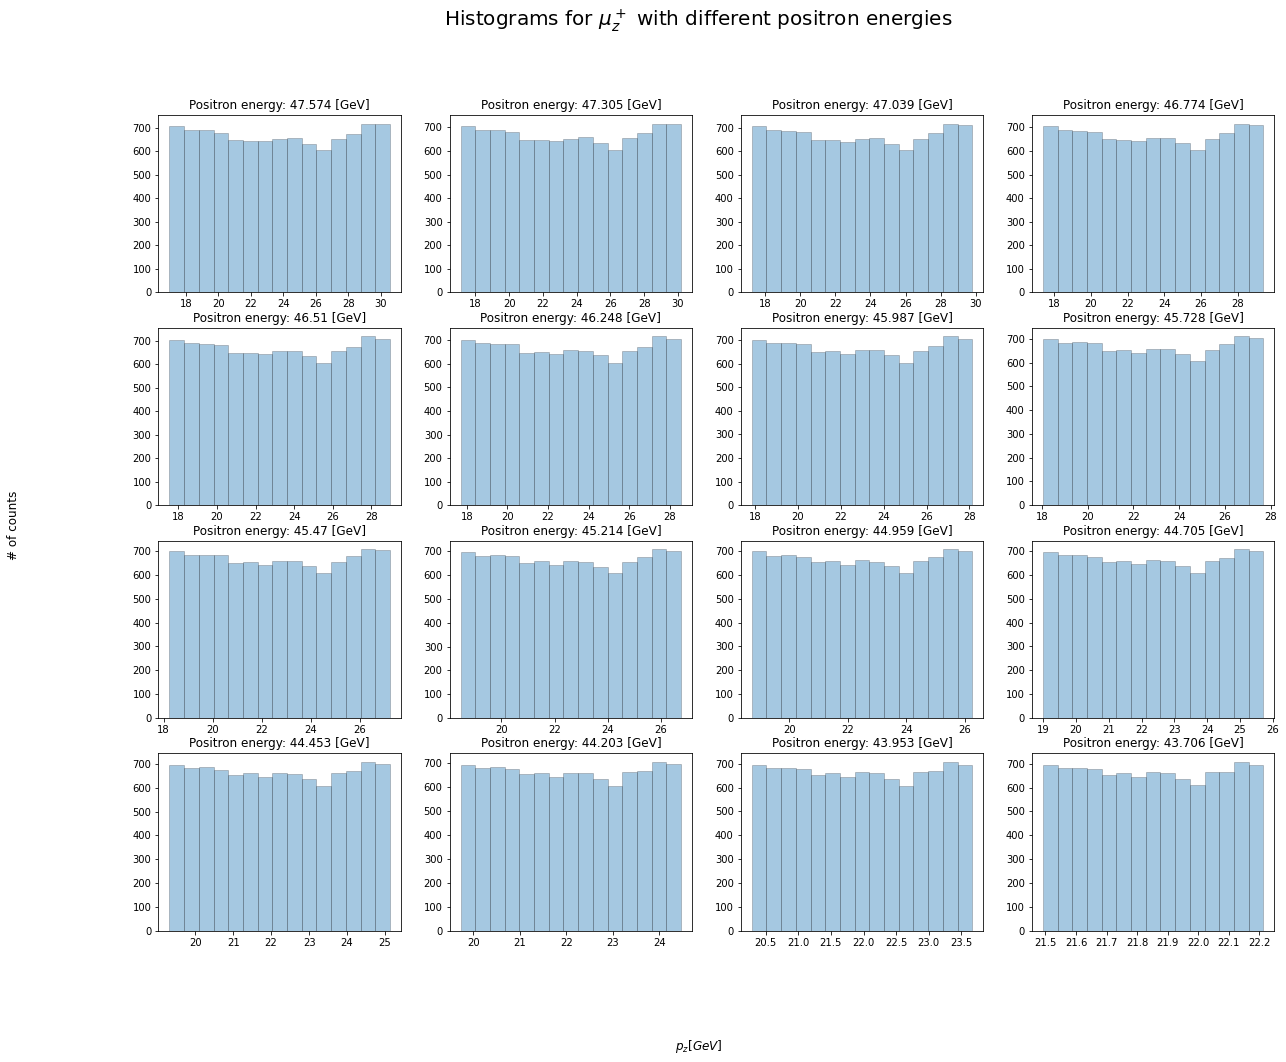

In [ ]:
#Generate anti-muon momemtum
plotting(muon_values[4], muon_values[3], "z", "+" )

()

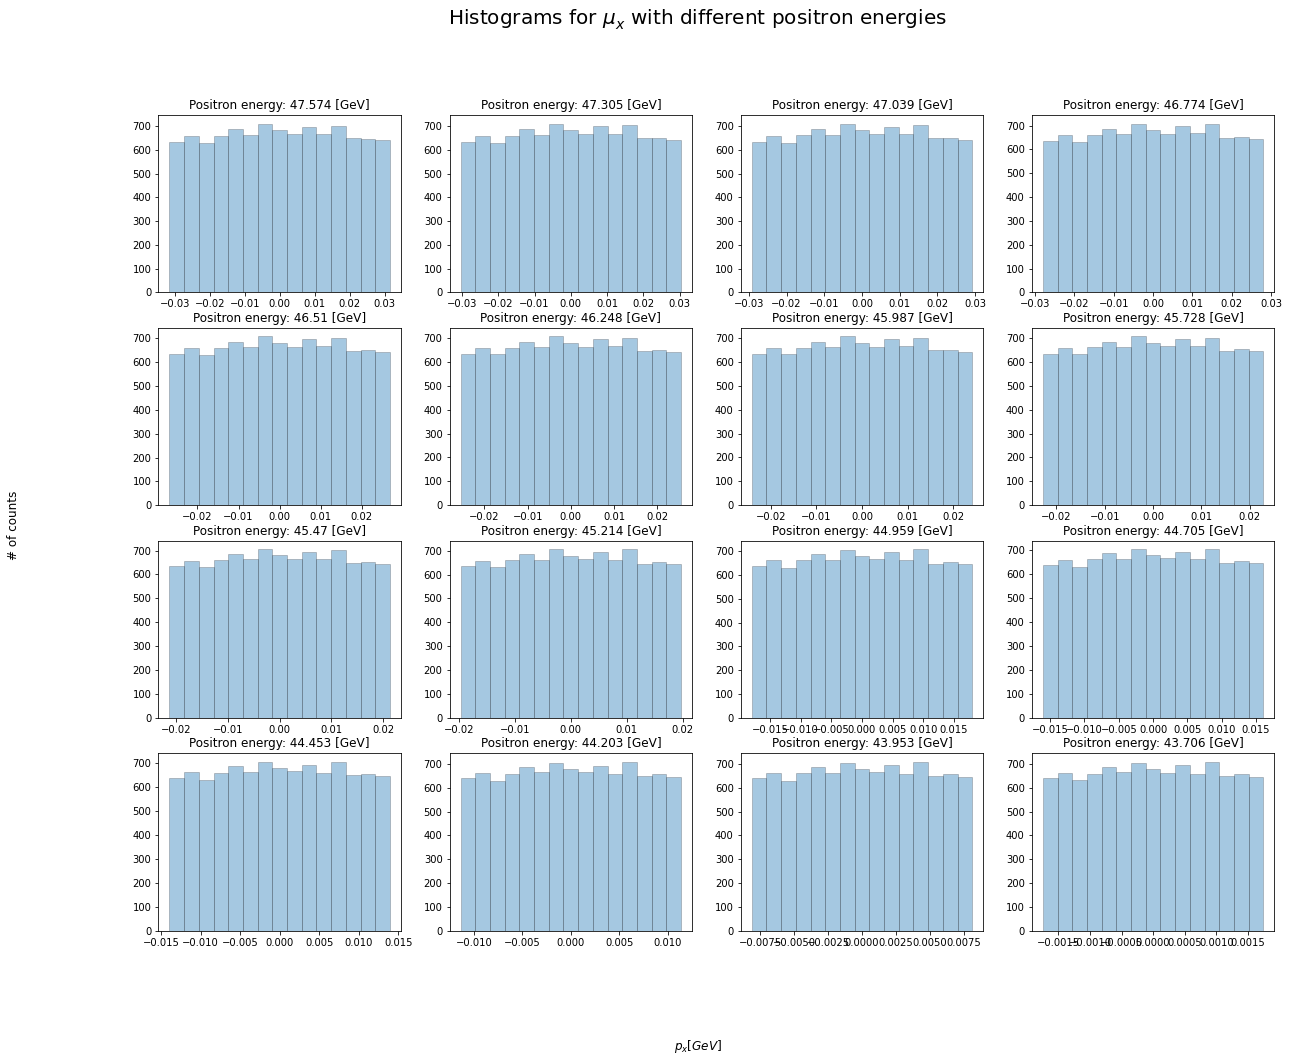

In [ ]:
plotting(muon_values[4], muon_values[0], "x", " " )

()

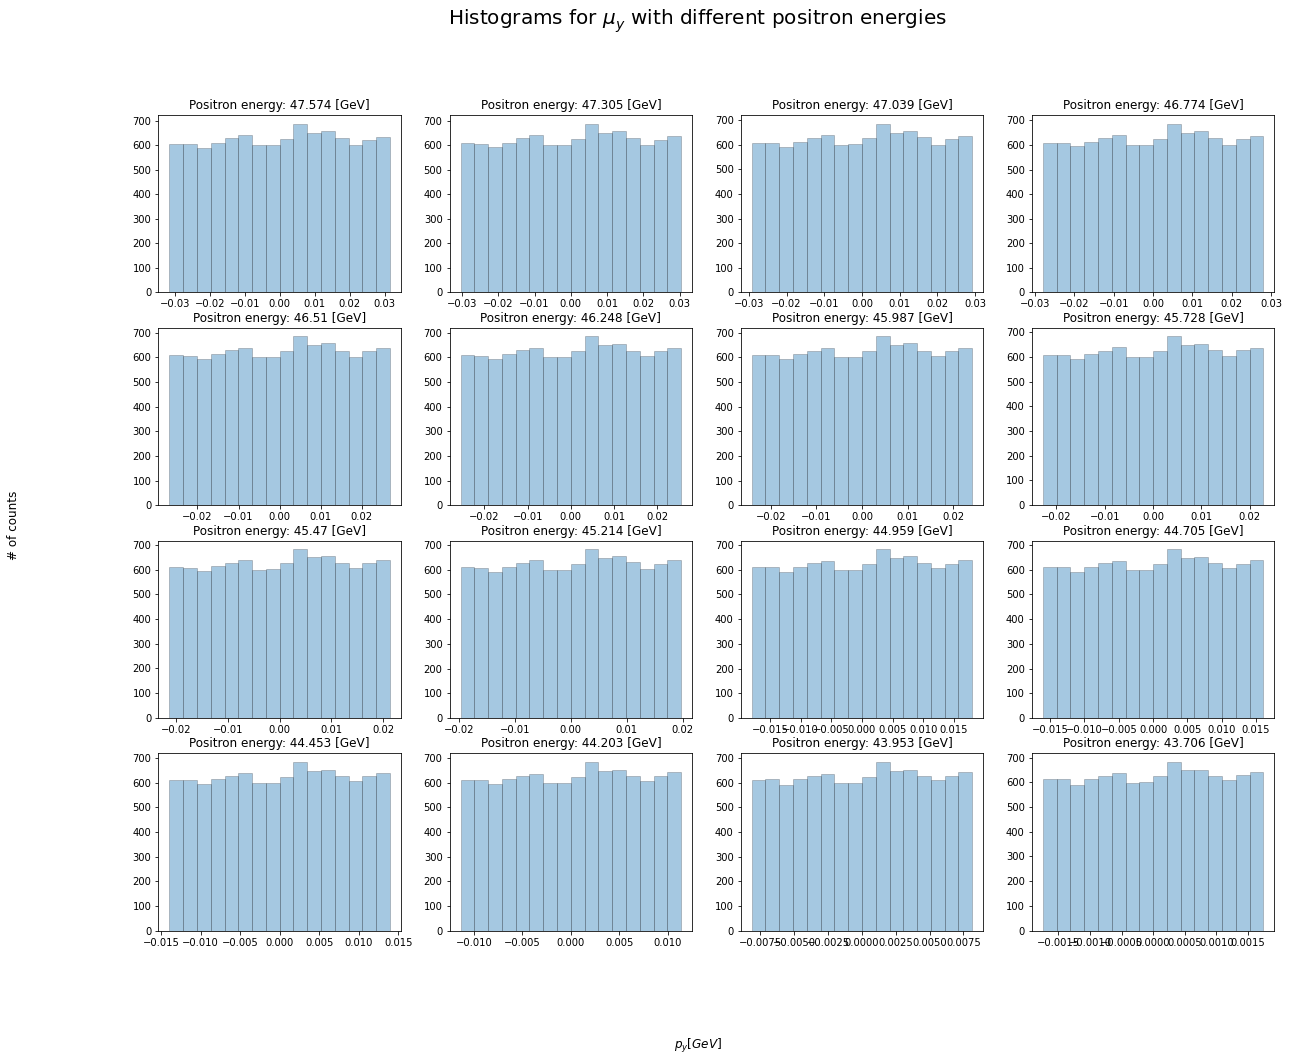

In [ ]:
plotting(muon_values[4], muon_values[1], "y", " " )

()

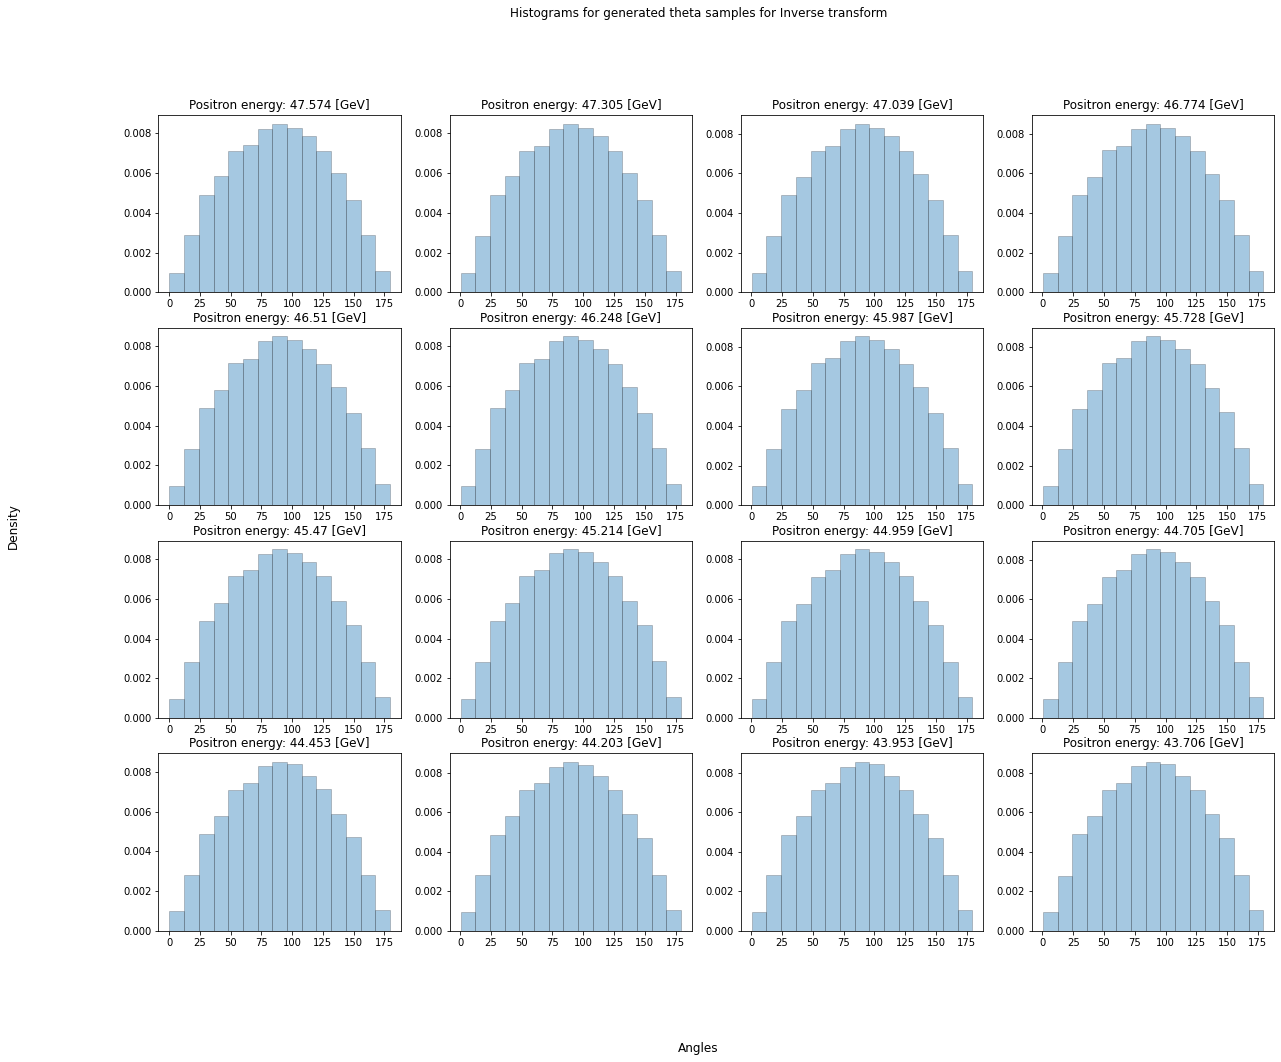

In [ ]:
def plotting_angles (energies, momentum):
    fig, ax = plt.subplots(int(np.sqrt(len(momentum))),int(np.sqrt(len(momentum))), figsize=(20,15))
    count = 0
    for i in range(0,int(np.sqrt(len(momentum)))):
        for j in range(0,int(np.sqrt(len(momentum)))):
            ax[i][j].hist(momentum[count],bins='doane', density=True, edgecolor='black', linewidth=0.5,alpha=0.4,  label='z')
            ax[i][j].set_title("Positron energy: {} [GeV]".format(round(energies[count],3)))
            count = count +1
    fig.suptitle("Histograms for generated theta samples for Inverse transform")
    fig.supxlabel("Angles")
    fig.supylabel('Density')
    return()

plotting_angles(muon_values[4], muon_values[5] )

()

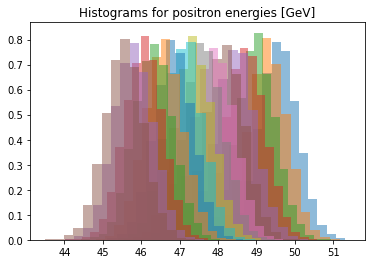

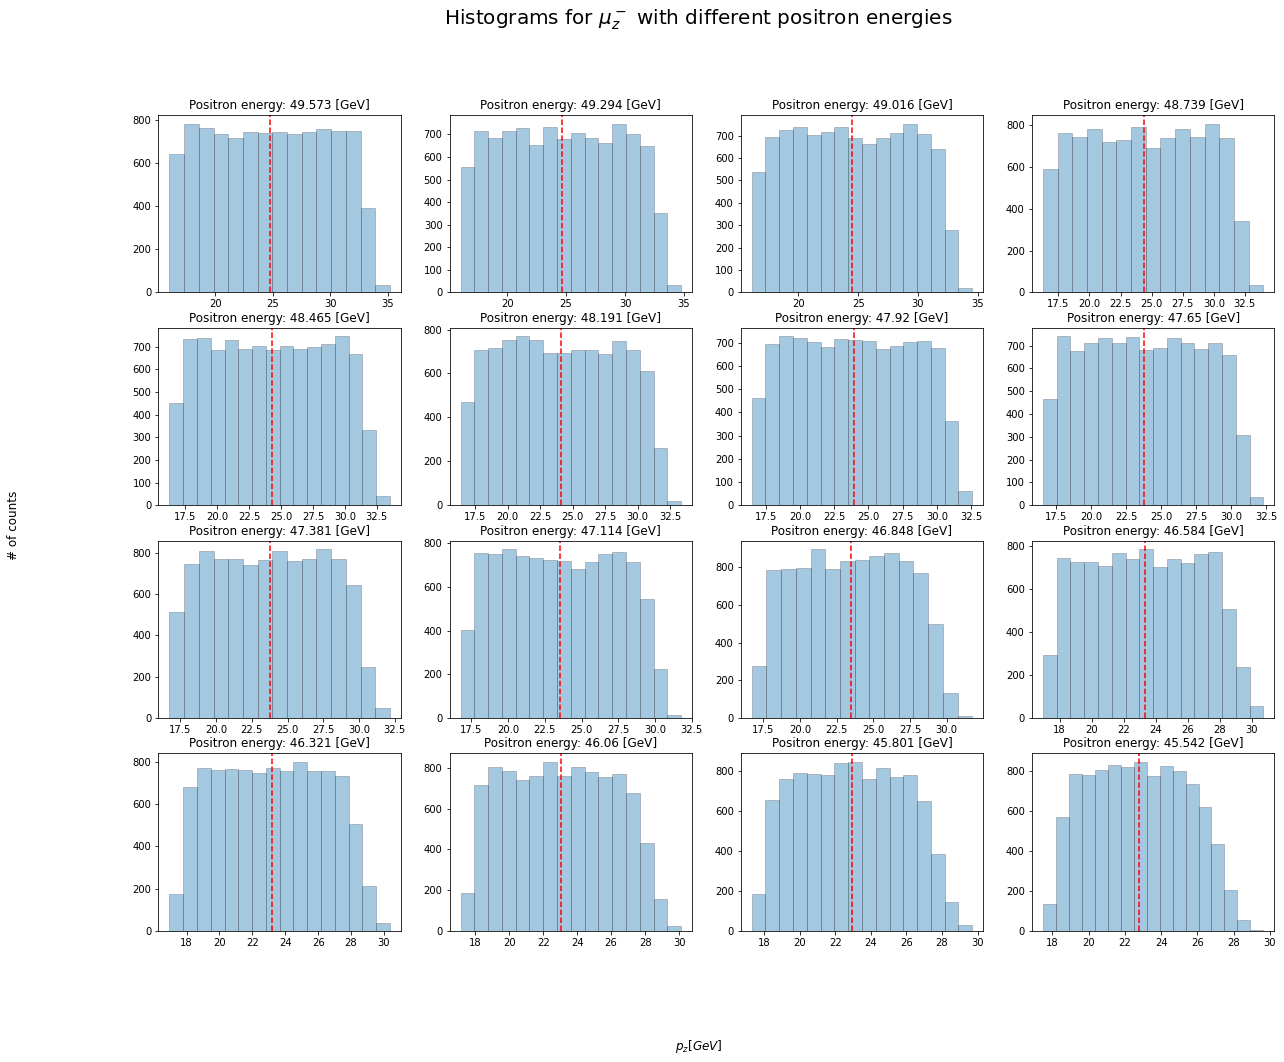

In [ ]:
def muon_generator( minimum_energy, number_of_layers, samples):
    #Divide target in number_of_layers layers 
    layers = np.linspace(0.01,2.99, number_of_layers)
    #Assume there will be N collisions per layer
    #Compute new positron energy per each layer due to energy dissipation
    energy_reduction_positron = energy_reduction(layers,minimum_energy+2,radiation_length(target_atomic_number,target_mollarmass))
    #Generate as much phi samples as existing theta values from montecarlo
    

    X=[]
    Y=[]
    Z=[]
    ZA=[]
    E=[]
    N=[]
    D=[]

    for i in range (0,len(energy_reduction_positron)):
        #Compute nwe energy of the center of mass
        energy_beam = np.random.normal(energy_reduction_positron[i], 0.5, samples)
        plt.hist(energy_beam, bins="doane", density=True, alpha=0.5)
        plt.title("Histograms for positron energies [GeV]")
        energy_CoM = np.sqrt(2*electron_mass*energy_beam)
        energy_CoM_filt = energy_CoM[energy_CoM>2*muon_mass]
        beta = - np.sqrt(1. - (4*electron_mass**2)/(energy_CoM_filt**2))
        gamma = 1/np.sqrt(1. - beta**2)

        #Generate new theta samples with the new energy of the center of mass  
        x = np.random.uniform(0,1,len(energy_CoM_filt))
        z = [optimize.brentq(pseudo_inverse_cum_function,-1,1,args=(x,s)) for x, s in zip(x, energy_CoM_filt**2)]

        theta_samples=np.array(np.arccos(z))
        phi_samples = 360*np.random.random(len(energy_CoM_filt))* np.pi/180


        x_momentum_lab, y_momentum_lab, z_momentum_lab, anti_z_momentum_lab, E_lab  = CoM_to_Lab(energy_CoM_filt/2, gamma, beta, theta_samples, phi_samples)
        X.append(x_momentum_lab)
        Y.append(y_momentum_lab)
        Z.append(z_momentum_lab)
        ZA.append(anti_z_momentum_lab)
        E.append(energy_reduction_positron[i])
        N=[]
        D.append(theta_samples*180/np.pi)

    return(X,Y,Z,ZA,E,D)

def plotting (energies, momentum, coordinate, s):
    fig, ax = plt.subplots(int(np.sqrt(len(momentum))),int(np.sqrt(len(momentum))), figsize=(20,15))
    count = 0
    for i in range(0,int(np.sqrt(len(momentum)))):
        for j in range(0,int(np.sqrt(len(momentum)))):
            ax[i][j].hist(momentum[count], bins='doane', edgecolor='black', linewidth=0.5,alpha=0.4,  label='z')
            ax[i][j].set_title("Positron energy: {} [GeV]".format(round(energies[count],3)))
            ax[i][j].axvline(np.mean(momentum[count]), color='red',linestyle='--', label='E_lab_distribution:{}'.format(np.mean(momentum[count])))
            count = count +1
    fig.suptitle('Histograms for $\mu^{}_{}$ with different positron energies '.format(s,coordinate), fontsize=20)
    fig.supxlabel('$p_{} [GeV]$'.format(coordinate))
    fig.supylabel('# of counts')
    return()

#Generate muon energies for 16 layers 
muon_values = muon_generator( nominal_energy, 16, 10000)
plotting(muon_values[4], muon_values[2], "z", "-" )

#**Conclusion**

We have just showed that it is possible to compute the whole physics  for the positron-electron annihilation focusing on the muon generation pair using Monte Carlo hit-miss method.  Taking into account the lab reference frame, assuming the electron is at rest and the loosing of energy due to the Bremsstrahlung interaction, it was found that energy threshold of a positron beam should be 47.58 GeV if we want an interaction within the whole 3 cm Berillium target. All muon momentum have been saved for future analysis

# **References**

[1] Antonelli, M., et al. "Novel proposal for a low emittance muon beam using positron beam on target." Nuclear Instruments and Methods in Physics Research Section A: Accelerators, Spectrometers, Detectors and Associated Equipment 807 (2016): 101-107.

[2] Schwartz, Matthew D. Quantum field theory and the standard model. Cambridge university press, 2014.

[3] M. Antonelli. Low	Emittance	Muon Collider (LEMMA) Slides

[4] von Schlippe, W. "Relativistic kinematics of particle interactions." URL www. helsinki. fi/~ www_sefo/phenomenology (2002).

[5] Gupta, Mukund. Calculation of radiation length in materials. No. PH-EP-Tech-Note-2010-013. 2010

[6] Antonelli, M., et al. "Novel proposal for a low emittance muon beam using positron beam on target." Nuclear Instruments and Methods in Physics Research Section A: Accelerators, Spectrometers, Detectors and Associated Equipment 807 (2016): 101-107.

[7] Amapane, N., et al. "Study of muon pair production from positron annihilation at threshold energy." Journal of Instrumentation 15.01 (2020): P01036.